<a href="https://colab.research.google.com/github/MiguelWO/IA/blob/main/Taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexion a Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerias a importar

In [ ]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

# Cargar imagenes


Dataset: [Mendeley Dataset](https://data.mendeley.com/datasets/4drtyfjtfy/1)

In [ ]:
!unzip "/content/drive/MyDrive/dataset2.zip"

Archive:  /content/drive/MyDrive/dataset2.zip
replace dataset2/cloudy/cloudy1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Separacion de datos para train y test (80% train, 20% val)
import splitfolders
splitfolders.ratio("dataset2",seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 1125 files [00:00, 3334.61 files/s]


### Importante

**Al momento de separar los imagenes entre entrenamiento y validacion, es necesario de cambiar la carpeta de "train" por "t"; ya que, una clase se llama "rain" y al buscar las imagenes correspondientes a esta clase se confunde **

In [ ]:
fnames_train = np.array(glob.glob("/content/output/t/*/*.jpg"))

In [ ]:
fnames_train

array(['/content/output/t/shine/shine63.jpg',
       '/content/output/t/shine/shine162.jpg',
       '/content/output/t/shine/shine216.jpg',
       '/content/output/t/shine/shine78.jpg',
       '/content/output/t/shine/shine51.jpg',
       '/content/output/t/shine/shine37.jpg',
       '/content/output/t/shine/shine71.jpg',
       '/content/output/t/shine/shine144.jpg',
       '/content/output/t/shine/shine203.jpg',
       '/content/output/t/shine/shine151.jpg',
       '/content/output/t/shine/shine114.jpg',
       '/content/output/t/shine/shine224.jpg',
       '/content/output/t/shine/shine232.jpg',
       '/content/output/t/shine/shine169.jpg',
       '/content/output/t/shine/shine88.jpg',
       '/content/output/t/shine/shine90.jpg',
       '/content/output/t/shine/shine246.jpg',
       '/content/output/t/shine/shine42.jpg',
       '/content/output/t/shine/shine202.jpg',
       '/content/output/t/shine/shine217.jpg',
       '/content/output/t/shine/shine15.jpg',
       '/content/outpu

In [ ]:
arr = []

for item in fnames_train:
  print(item)
  if "cloudy" in item:
    arr.append("cloudy")
  elif "rain" in item:
    arr.append("rain")
  elif "shine" in item:
    arr.append("shine")
  else:
    arr.append("sunrise")

labels_train = np.array(arr)

/content/output/t/shine/shine63.jpg
/content/output/t/shine/shine162.jpg
/content/output/t/shine/shine216.jpg
/content/output/t/shine/shine78.jpg
/content/output/t/shine/shine51.jpg
/content/output/t/shine/shine37.jpg
/content/output/t/shine/shine71.jpg
/content/output/t/shine/shine144.jpg
/content/output/t/shine/shine203.jpg
/content/output/t/shine/shine151.jpg
/content/output/t/shine/shine114.jpg
/content/output/t/shine/shine224.jpg
/content/output/t/shine/shine232.jpg
/content/output/t/shine/shine169.jpg
/content/output/t/shine/shine88.jpg
/content/output/t/shine/shine90.jpg
/content/output/t/shine/shine246.jpg
/content/output/t/shine/shine42.jpg
/content/output/t/shine/shine202.jpg
/content/output/t/shine/shine217.jpg
/content/output/t/shine/shine15.jpg
/content/output/t/shine/shine125.jpg
/content/output/t/shine/shine160.jpg
/content/output/t/shine/shine120.jpg
/content/output/t/shine/shine239.jpg
/content/output/t/shine/shine105.jpg
/content/output/t/shine/shine89.jpg
/content/ou

In [ ]:
labels_train

array(['shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shine', 'shine', 'shine', 'shine', 'shine', 'shine',
       'shine', 'shi

In [ ]:
np.unique(labels_train,return_counts=True)

(array(['cloudy', 'rain', 'shine', 'sunrise'], dtype='<U7'),
 array([240, 170, 202, 284]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Clases')

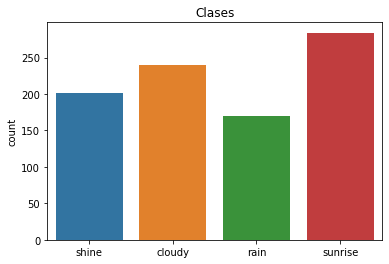

In [ ]:
sns.countplot(labels_train)
plt.title("Clases")

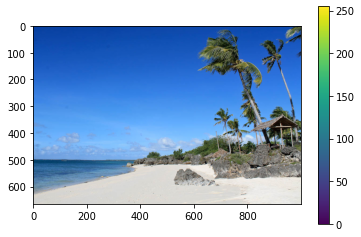

In [ ]:
img = plt.imread(fnames_train[0])
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [ ]:
img.shape

(667, 1000, 3)

In [ ]:
df = pd.DataFrame({"images": fnames_train, "class":labels_train})
df

,images,class
0,/content/output/t/shine/shine63.jpg,shine
1,/content/output/t/shine/shine162.jpg,shine
2,/content/output/t/shine/shine216.jpg,shine
3,/content/output/t/shine/shine78.jpg,shine
4,/content/output/t/shine/shine51.jpg,shine
...,...,...
891,/content/output/t/sunrise/sunrise229.jpg,sunrise
892,/content/output/t/sunrise/sunrise246.jpg,sunrise
893,/content/output/t/sunrise/sunrise87.jpg,sunrise
894,/content/output/t/sunrise/sunrise92.jpg,sunrise


In [ ]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
batch_size=64,
seed=5,
shuffle=False,
class_mode='categorical',
target_size=(64, 64))

Found 896 validated image filenames belonging to 4 classes.


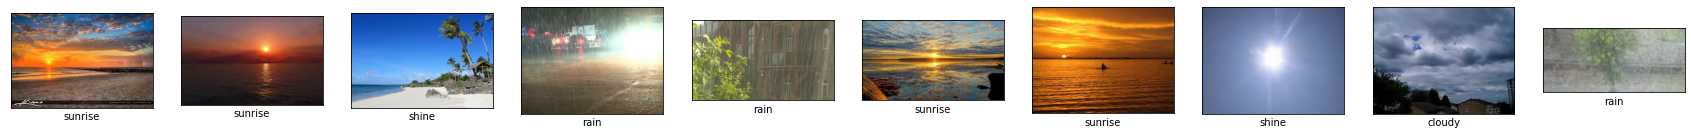

In [ ]:
import random

plt.figure(figsize=(30,30))
for j in range(10):
    i = int(random.random()*len(fnames_train))
    plt.subplot(10,10,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = plt.imread(fnames_train[i])
    plt.imshow(img)
    plt.xlabel(labels_train[i])
    j+=1
plt.show()

In [ ]:
fnames_test = np.array(glob.glob("/content/output/val/*/*.jpg"))
labels_test = np.array([("cloudy" if "cloudy" in fname else "rain" if "rain" in fname else "shine" if "shine" in fname else "sunrise") for fname in fnames_test])

In [ ]:
df_test = pd.DataFrame({"images": fnames_test, "class":labels_test})
df_test

,images,class
0,/content/output/val/shine/shine251.jpg,shine
1,/content/output/val/shine/shine18.jpg,shine
2,/content/output/val/shine/shine138.jpg,shine
3,/content/output/val/shine/shine61.jpg,shine
4,/content/output/val/shine/shine5.jpg,shine
...,...,...
221,/content/output/val/sunrise/sunrise191.jpg,sunrise
222,/content/output/val/sunrise/sunrise331.jpg,sunrise
223,/content/output/val/sunrise/sunrise106.jpg,sunrise
224,/content/output/val/sunrise/sunrise240.jpg,sunrise


In [ ]:
test_generator=datagen.flow_from_dataframe(
dataframe=df_test,
x_col="images",
y_col="class",
batch_size=64,
seed=5,
shuffle=False,
class_mode='categorical',
target_size=(64, 64))

Found 226 validated image filenames belonging to 4 classes.


# Modelo

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs=30
history = classifier.fit(train_generator,epochs = epochs,validation_data = test_generator)

Epoch 1/30
14/14 [==============================] - 7s 455ms/step - loss: 1.4179 - accuracy: 0.2790 - val_loss: 1.1224 - val_accuracy: 0.3186
Epoch 2/30
14/14 [==============================] - 7s 454ms/step - loss: 1.0553 - accuracy: 0.4408 - val_loss: 0.9879 - val_accuracy: 0.5088
Epoch 3/30
14/14 [==============================] - 11s 776ms/step - loss: 0.9861 - accuracy: 0.4810 - val_loss: 0.9809 - val_accuracy: 0.5796
Epoch 4/30
14/14 [==============================] - 6s 424ms/step - loss: 0.9526 - accuracy: 0.5737 - val_loss: 0.8233 - val_accuracy: 0.6018
Epoch 5/30
14/14 [==============================] - 10s 734ms/step - loss: 0.8716 - accuracy: 0.4676 - val_loss: 0.7932 - val_accuracy: 0.5442
Epoch 6/30
14/14 [==============================] - 6s 453ms/step - loss: 0.9311 - accuracy: 0.4464 - val_loss: 0.8007 - val_accuracy: 0.6416
Epoch 7/30
14/14 [==============================] - 6s 448ms/step - loss: 0.8356 - accuracy: 0.5413 - val_loss: 0.7450 - val_accuracy: 0.6062
Epoc

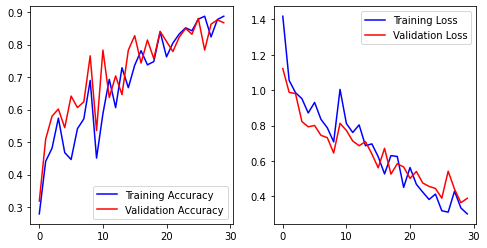

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
prediction=classifier.predict(test_generator)

4/4 [==============================] - 2s 396ms/step


In [ ]:
predictions = [np.argmax(prediction) for prediction in prediction]

In [ ]:
prediction_labels = ["cloudy" if p == 0 else "rain" if p == 1 else "shine" if p ==2 else "sunrise" for p in predictions]

Text(0.5, 0, 'shine 0.9886503 shine')

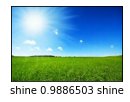

In [ ]:
index_image=10
plt.figure(figsize=(2,2))
plt.grid(False)
plt.xticks([])
plt.yticks([])
im=plt.imread(fnames_test[index_image])
plt.imshow(im)

plt.xlabel(prediction_labels[index_image] + " " + str(prediction[index_image][predictions[index_image]]) + " " + labels_test[index_image])
# plt.xlabel("{} {:2.0f} ({})".format(prediction_labels[index_image],
#                               prediction[index_image][predictions[index_image]],
#                               labels_test[index_image]))

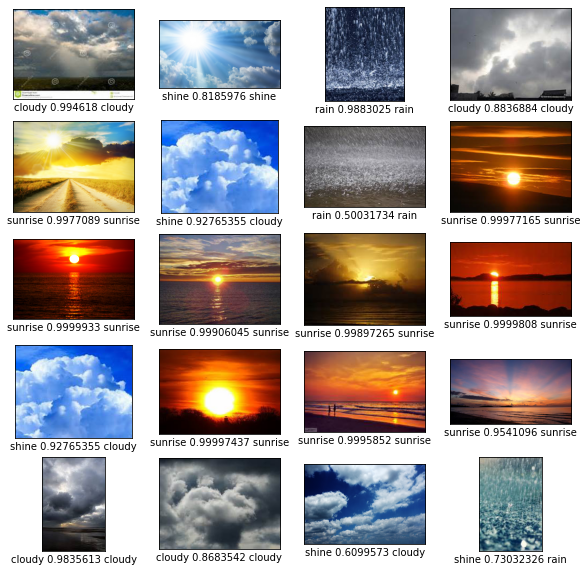

In [ ]:
plt.figure(figsize=(10,10))
for j in range(20):
  index_image = int(random.random()*len(fnames_test))
  plt.subplot(5, 4, j+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(fnames_test[index_image])
  plt.imshow(im)

  color= 'blue' if prediction_labels[index_image] == labels_test[index_image] else 'red'
  plt.xlabel(prediction_labels[index_image] + " " + str(prediction[index_image][predictions[index_image]]) + " " + labels_test[index_image])
  # plt.xlabel("{} {:2.0f} ({})".format(prediction_labels[index_image],
  #                               predictions[index_image][predictions[index_image]],
  #                               labels_test[index_image]))
  # plt.xlabel(f'{prediction_labels} {np.max(predictions[index_image][0]):.4f} ({labels_test[index_image]})', color=color)

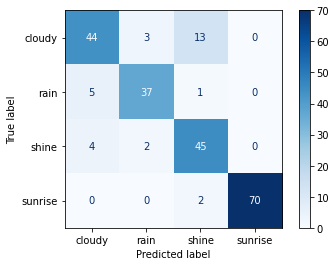

In [ ]:
cm = confusion_matrix(labels_test, prediction_labels)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
error = 1 - accuracy
print(accuracy, error)

0.8672566371681416 0.1327433628318584


# Modelo VGG16

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [ ]:
def create_generator(batch_size, target_size):
  train_generator=datagen.flow_from_dataframe(
  dataframe=df,
  x_col="images",
  y_col="class",
  batch_size=batch_size,
  seed=5,
  shuffle=True,
  class_mode='categorical',
  target_size=target_size)

  test_generator=datagen.flow_from_dataframe(
  dataframe=df_test,
  x_col="images",
  y_col="class",
  batch_size=batch_size,
  seed=5,
  shuffle=False,
  class_mode='categorical',
  target_size=target_size)

  return train_generator, test_generator

In [ ]:
train_generator, test_generator = create_generator(64,(224,224))

Found 896 validated image filenames belonging to 4 classes.
Found 226 validated image filenames belonging to 4 classes.


In [ ]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=test_generator, validation_steps=len(test_generator), 
                              epochs=30, verbose=1)

Epoch 1/30
14/14 [==============================] - 10s 685ms/step - loss: 1.8661 - accuracy: 0.4888 - val_loss: 0.8138 - val_accuracy: 0.7035
Epoch 2/30
14/14 [==============================] - 10s 741ms/step - loss: 0.5340 - accuracy: 0.8203 - val_loss: 0.4544 - val_accuracy: 0.8363
Epoch 3/30
14/14 [==============================] - 9s 634ms/step - loss: 0.2640 - accuracy: 0.9230 - val_loss: 0.3295 - val_accuracy: 0.8850
Epoch 4/30
14/14 [==============================] - 9s 648ms/step - loss: 0.1589 - accuracy: 0.9621 - val_loss: 0.2908 - val_accuracy: 0.9027
Epoch 5/30
14/14 [==============================] - 9s 637ms/step - loss: 0.1105 - accuracy: 0.9833 - val_loss: 0.2637 - val_accuracy: 0.8982
Epoch 6/30
14/14 [==============================] - 9s 646ms/step - loss: 0.0781 - accuracy: 0.9900 - val_loss: 0.2674 - val_accuracy: 0.8894
Epoch 7/30
14/14 [==============================] - 9s 632ms/step - loss: 0.0571 - accuracy: 0.9967 - val_loss: 0.2698 - val_accuracy: 0.8982
Epoc

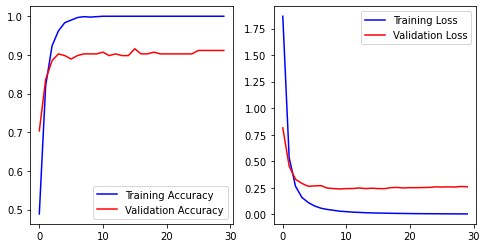

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
prediction=model.predict(test_generator)
predictions = [np.argmax(p) for p in prediction]
prediction_labels = ["cloudy" if p == 0 else "rain" if p == 1 else "shine" if p ==2 else "sunrise" for p in predictions]

4/4 [==============================] - 2s 538ms/step


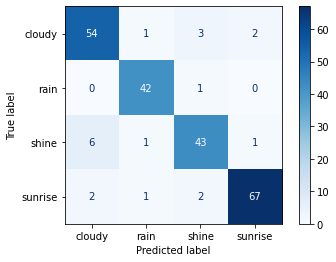

In [ ]:
cm = confusion_matrix(labels_test, prediction_labels)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
error = 1 - accuracy
print(accuracy, error)

0.911504424778761 0.08849557522123896


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(labels_test, prediction_labels, target_names=classes))

              precision    recall  f1-score   support

      cloudy       0.87      0.90      0.89        60
        rain       0.93      0.98      0.95        43
       shine       0.88      0.84      0.86        51
     sunrise       0.96      0.93      0.94        72

    accuracy                           0.91       226
   macro avg       0.91      0.91      0.91       226
weighted avg       0.91      0.91      0.91       226



# InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
train_generator, test_generator = create_generator(64,(299,299))

Found 896 validated image filenames belonging to 4 classes.
Found 226 validated image filenames belonging to 4 classes.


In [ ]:
model = InceptionV3(include_top=False, input_shape=(299, 299, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(4, activation='softmax')(x)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=test_generator, validation_steps=len(test_generator), 
                              epochs=30, verbose=1)

Epoch 1/30
14/14 [==============================] - 22s 1s/step - loss: 6.7561 - accuracy: 0.6629 - val_loss: 2.0348 - val_accuracy: 0.8584
Epoch 2/30
14/14 [==============================] - 9s 637ms/step - loss: 1.0967 - accuracy: 0.8895 - val_loss: 0.6723 - val_accuracy: 0.9248
Epoch 3/30
14/14 [==============================] - 10s 666ms/step - loss: 0.2408 - accuracy: 0.9777 - val_loss: 0.7334 - val_accuracy: 0.9425
Epoch 4/30
14/14 [==============================] - 15s 1s/step - loss: 0.0773 - accuracy: 0.9911 - val_loss: 0.6552 - val_accuracy: 0.9248
Epoch 5/30
14/14 [==============================] - 9s 632ms/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 0.6686 - val_accuracy: 0.9469
Epoch 6/30
14/14 [==============================] - 11s 753ms/step - loss: 0.0051 - accuracy: 0.9978 - val_loss: 0.6409 - val_accuracy: 0.9513
Epoch 7/30
14/14 [==============================] - 9s 632ms/step - loss: 0.0064 - accuracy: 0.9989 - val_loss: 0.6194 - val_accuracy: 0.9469
Epoch 8/

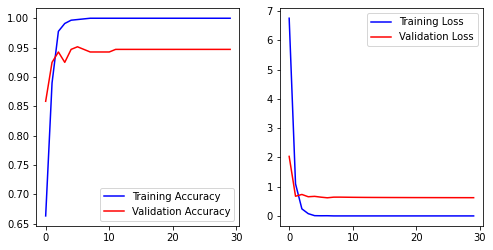

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
prediction=model.predict(test_generator)
predictions = [np.argmax(p) for p in prediction]
prediction_labels = ["cloudy" if p == 0 else "rain" if p == 1 else "shine" if p ==2 else "sunrise" for p in predictions]

4/4 [==============================] - 3s 544ms/step


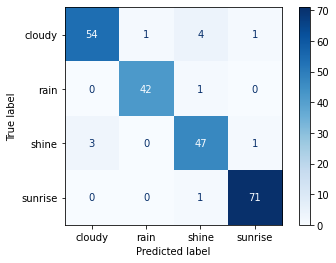

In [ ]:
cm = confusion_matrix(labels_test, prediction_labels)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
error = 1 - accuracy
print(accuracy, error)

0.9469026548672567 0.053097345132743334


In [ ]:
print(classification_report(labels_test, prediction_labels, target_names=classes))

              precision    recall  f1-score   support

      cloudy       0.95      0.90      0.92        60
        rain       0.98      0.98      0.98        43
       shine       0.89      0.92      0.90        51
     sunrise       0.97      0.99      0.98        72

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226



# Modelo Xception

In [ ]:
train_generator, test_generator = create_generator(64,(224,224))

Found 896 validated image filenames belonging to 4 classes.
Found 226 validated image filenames belonging to 4 classes.


In [ ]:
model = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(4, activation='softmax')(x)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=test_generator, validation_steps=len(test_generator), 
                              epochs=30, verbose=1)

Epoch 1/30
14/14 [==============================] - 13s 777ms/step - loss: 3.9197 - accuracy: 0.6607 - val_loss: 1.1708 - val_accuracy: 0.8142
Epoch 2/30
14/14 [==============================] - 9s 617ms/step - loss: 0.6031 - accuracy: 0.8951 - val_loss: 0.8100 - val_accuracy: 0.8496
Epoch 3/30
14/14 [==============================] - 9s 616ms/step - loss: 0.1814 - accuracy: 0.9487 - val_loss: 0.7773 - val_accuracy: 0.8496
Epoch 4/30
14/14 [==============================] - 9s 577ms/step - loss: 0.1205 - accuracy: 0.9654 - val_loss: 0.4961 - val_accuracy: 0.9248
Epoch 5/30
14/14 [==============================] - 8s 598ms/step - loss: 0.0314 - accuracy: 0.9888 - val_loss: 0.5152 - val_accuracy: 0.9115
Epoch 6/30
14/14 [==============================] - 8s 599ms/step - loss: 0.0131 - accuracy: 0.9944 - val_loss: 0.5015 - val_accuracy: 0.8982
Epoch 7/30
14/14 [==============================] - 8s 614ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5016 - val_accuracy: 0.9071
Epoch

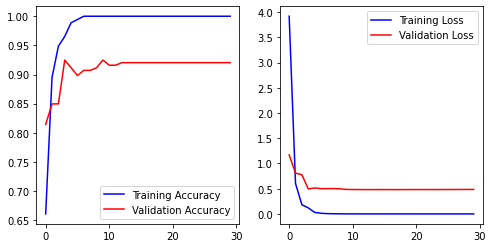

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
prediction=model.predict(test_generator)
predictions = [np.argmax(p) for p in prediction]
prediction_labels = ["cloudy" if p == 0 else "rain" if p == 1 else "shine" if p ==2 else "sunrise" for p in predictions]

4/4 [==============================] - 2s 502ms/step


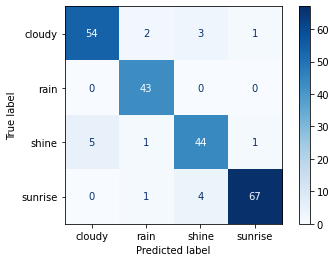

In [ ]:
cm = confusion_matrix(labels_test, prediction_labels)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
error = 1 - accuracy
print(accuracy, error)

0.9203539823008849 0.07964601769911506


In [ ]:
print(classification_report(labels_test, prediction_labels, target_names=classes))

              precision    recall  f1-score   support

      cloudy       0.92      0.90      0.91        60
        rain       0.91      1.00      0.96        43
       shine       0.86      0.86      0.86        51
     sunrise       0.97      0.93      0.95        72

    accuracy                           0.92       226
   macro avg       0.92      0.92      0.92       226
weighted avg       0.92      0.92      0.92       226



# Modelo ResNet152V2


In [ ]:
train_generator, test_generator = create_generator(64,(224,224))

Found 896 validated image filenames belonging to 4 classes.
Found 226 validated image filenames belonging to 4 classes.


In [ ]:
model = tf.keras.applications.ResNet152V2(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(4, activation='softmax')(x)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=test_generator, validation_steps=len(test_generator), 
                              epochs=30, verbose=1)

Epoch 1/30
14/14 [==============================] - 32s 2s/step - loss: 2.9385 - accuracy: 0.7612 - val_loss: 0.6643 - val_accuracy: 0.9425
Epoch 2/30
14/14 [==============================] - 10s 716ms/step - loss: 0.3185 - accuracy: 0.9565 - val_loss: 0.4641 - val_accuracy: 0.9469
Epoch 3/30
14/14 [==============================] - 10s 718ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.4003 - val_accuracy: 0.9513
Epoch 4/30
14/14 [==============================] - 10s 706ms/step - loss: 8.5257e-04 - accuracy: 1.0000 - val_loss: 0.4356 - val_accuracy: 0.9469
Epoch 5/30
14/14 [==============================] - 10s 691ms/step - loss: 1.8306e-04 - accuracy: 1.0000 - val_loss: 0.4394 - val_accuracy: 0.9469
Epoch 6/30
14/14 [==============================] - 10s 692ms/step - loss: 4.9858e-05 - accuracy: 1.0000 - val_loss: 0.4414 - val_accuracy: 0.9469
Epoch 7/30
14/14 [==============================] - 10s 681ms/step - loss: 4.1985e-05 - accuracy: 1.0000 - val_loss: 0.4425 - val_acc

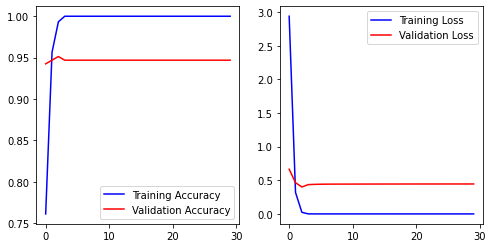

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
prediction=model.predict(test_generator)
predictions = [np.argmax(p) for p in prediction]
prediction_labels = ["cloudy" if p == 0 else "rain" if p == 1 else "shine" if p ==2 else "sunrise" for p in predictions]

4/4 [==============================] - 4s 568ms/step


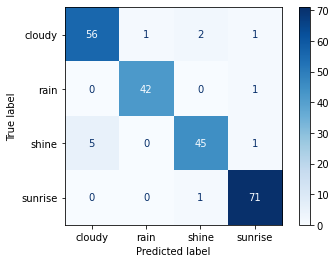

In [ ]:
cm = confusion_matrix(labels_test, prediction_labels)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
error = 1 - accuracy
print(accuracy, error)

0.9469026548672567 0.053097345132743334


In [ ]:
print(classification_report(labels_test, prediction_labels, target_names=classes))

              precision    recall  f1-score   support

      cloudy       0.92      0.93      0.93        60
        rain       0.98      0.98      0.98        43
       shine       0.94      0.88      0.91        51
     sunrise       0.96      0.99      0.97        72

    accuracy                           0.95       226
   macro avg       0.95      0.94      0.95       226
weighted avg       0.95      0.95      0.95       226

